In [53]:
#Import modules
#Preprocessing
import pandas as pd
import missingno as msno
import numpy as np

#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Regression
from scipy.stats import skew
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [54]:
#Reading the csv file
df = pd.read_csv('./sample_data/monet.csv')
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [55]:
df.tail()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
425,5.2825,25.6,39.4,1,375,1
426,9.3525,25.9,39.6,1,375,2
427,8.2525,25.6,39.6,1,375,1
428,3.4100,25.6,39.4,1,386,2
429,1.5425,25.7,32.0,1,387,1


In [56]:
#Gives the Information of Data types and the non-null columns details can be figured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


#### Its observed there are no null columns in the data type and the data is assumed to be clean

In [7]:
#See the number of Rows and columns in the data
df.shape

(430, 6)

In [57]:
#Derive a New column names Size using the Height and width columns

# Creating size column
df['SIZE'] = df['HEIGHT']*df['WIDTH']

In [58]:
df

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40
...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64
426,9.352500,25.9,39.6,1,375,2,1025.64
427,8.252500,25.6,39.6,1,375,1,1013.76
428,3.410000,25.6,39.4,1,386,2,1008.64


In [59]:
#Data Normalization
#Applying Min-Max scaler
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df)
minmax_df = pd.DataFrame(minmax_df, columns =df.columns)

minmax_df

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,0.120697,0.232620,0.229648,1.0,0.000000,0.0,0.084174
1,0.266326,0.374332,0.229648,1.0,0.002591,0.5,0.128172
2,0.003675,0.040107,0.111786,0.0,0.005181,1.0,0.013552
3,0.061421,0.291444,0.307412,1.0,0.007772,0.5,0.129106
4,0.044756,0.291444,0.307412,1.0,0.007772,0.5,0.129106
...,...,...,...,...,...,...,...
425,0.159745,0.290107,0.397327,1.0,0.968912,0.0,0.159303
426,0.283067,0.294118,0.399757,1.0,0.968912,0.5,0.162059
427,0.249737,0.290107,0.399757,1.0,0.968912,0.0,0.160133
428,0.103008,0.290107,0.397327,1.0,0.997409,0.5,0.159303


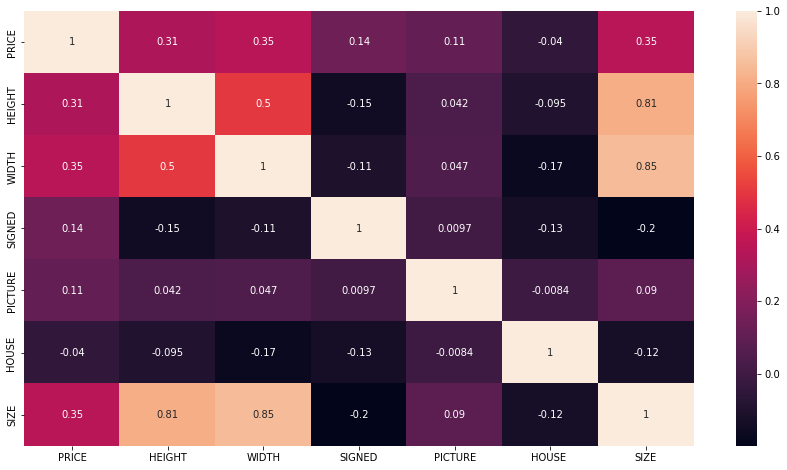

In [60]:
# Finding correlation between the variables

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(minmax_df.corr(), annot=True)

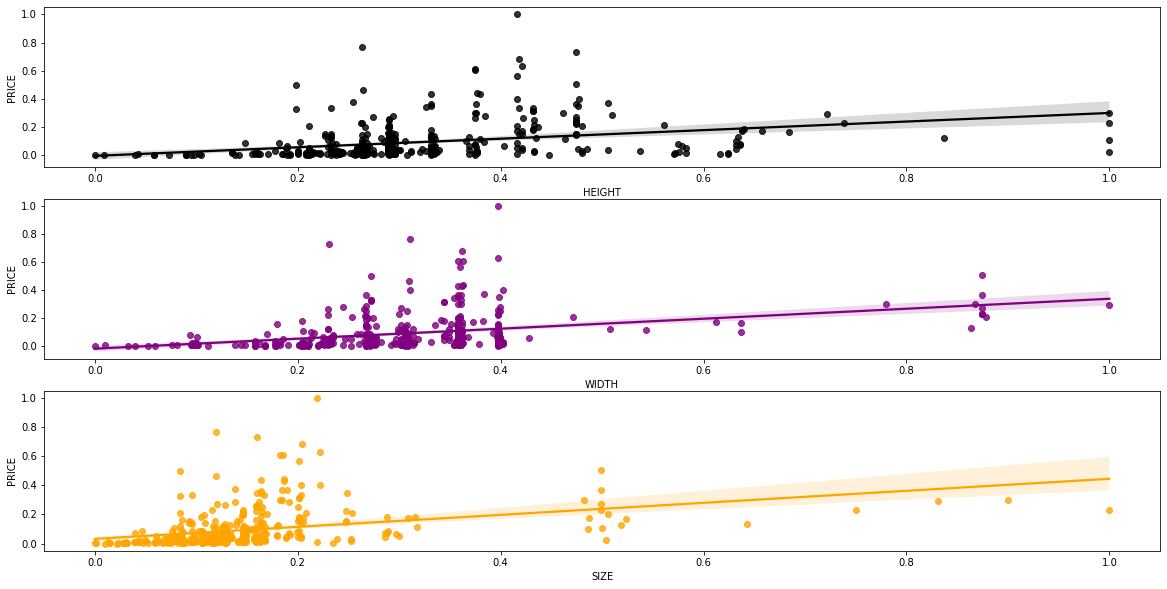

In [61]:
# We can check this more clearly by using scatter plot

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
sns.regplot(x='HEIGHT',y='PRICE',data=minmax_df, scatter=True, fit_reg=True, ax=ax1, color='black')
sns.regplot(x='WIDTH',y='PRICE',data=minmax_df, scatter=True, fit_reg=True, ax=ax2, color='purple')
sns.regplot(x='SIZE',y='PRICE',data=minmax_df, scatter=True, fit_reg=True, ax=ax3, color='orange')

In [62]:
# Simple Linear Regression model 1

X = minmax_df[['SIZE']].values
y= minmax_df['PRICE'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr_model1 = linear_model.LinearRegression()
lr_model1.fit(X_train, y_train)

y_pred = lr_model1.predict(X_test)
price_pred_act = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_pred_act

,Actual Price,Predicted Price
0,0.027197,0.096124
1,0.026530,0.053892
2,0.022797,0.095022
3,0.010350,0.058550
4,0.113083,0.090779
...,...,...
81,0.041821,0.077665
82,0.008426,0.067874
83,0.044756,0.083163
84,0.228138,0.090640


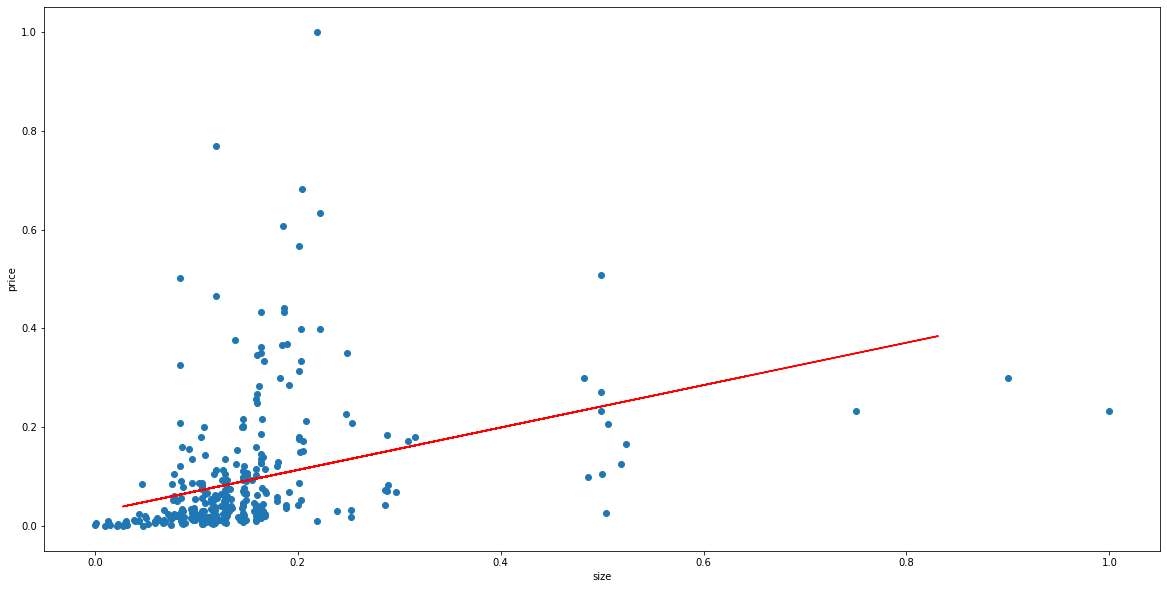

In [64]:
# Linear Regression plot for this model 1
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("size")
plt.ylabel("price")
plt.show()

In [65]:
# Checking the accuracy of the model using Loss functions
# Mean Square Error/Quadratic Loss/L2 Loss

root_mean_square_error = np.sqrt(mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.12255377148102824


In [66]:
#mean_absolute_error = mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

0.08137264155349738


In [72]:
# Simple Linear Regression model 2

X = minmax_df[['HEIGHT']].values
y= minmax_df['PRICE'].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr_model2= linear_model.LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred2 = lr_model2.predict(X_test)
price_pred_act = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred2})
price_pred_act

,Actual Price,Predicted Price
0,0.027197,0.083182
1,0.026530,0.041546
2,0.022797,0.088924
3,0.010350,0.059133
4,0.113083,0.083182
...,...,...
81,0.041821,0.076003
82,0.008426,0.066671
83,0.044756,0.083540
84,0.228138,0.076003


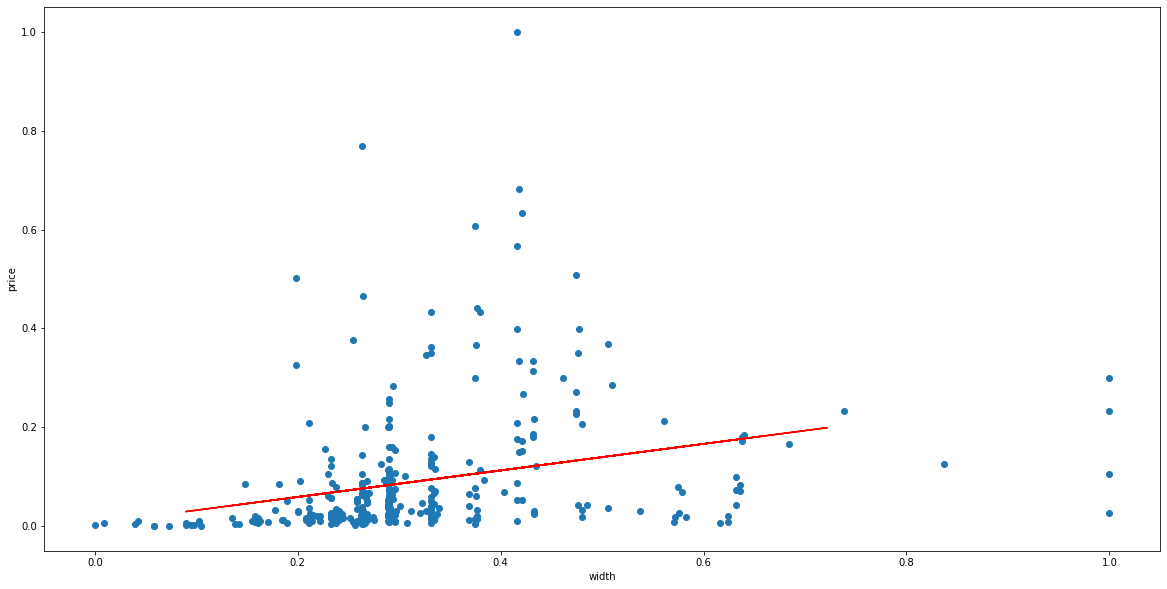

In [74]:
# Linear Regression plot for this model 2
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred2, color = 'red')
plt.xlabel("width")
plt.ylabel("price")
plt.show()

In [75]:

root_mean_square_error = np.sqrt(mean_squared_error(y_test, y_pred2))
print(root_mean_square_error)

0.11891186984235169


In [76]:
# Mean Absolute Error/L1 Loss

print(mean_absolute_error(y_test, y_pred2))

0.0776604945861369


In [80]:
# Multiple Linear Regression model 3


X = minmax_df[['WIDTH', 'HEIGHT','SIZE','SIGNED','PICTURE', 'HOUSE ']].values
y= minmax_df['PRICE'].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
lr_model3 = linear_model.LinearRegression()
lr_model3.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = lr_model3.predict(X_test)

In [84]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,0.027197,0.116669
1,0.026530,0.052112
2,0.022797,0.097373
3,0.010350,0.038586
4,0.113083,0.105456
...,...,...
81,0.041821,0.082326
82,0.008426,0.014725
83,0.044756,0.085562
84,0.228138,0.138714


In [86]:
root_mean_square_error = np.sqrt(mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.11872915170139896


In [88]:
mean_absolute_error = mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

0.07728625395132689
